In [1]:
#1. Implement	logistic	regression	using	Python /R to perform classification on a given dataset.

#2. Compute Confusion Matrix of findTP,FP,TN,FN,Accuracy, Error Rate, Precision,Recall on the given dataset


In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("Social_Network_Ads.csv")

In [3]:
df


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
df.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [6]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [7]:
df.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [8]:
df.isna().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-agvfkith because the default path (/home/sauravmuke/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [10]:
correlation=df.corr().abs()
print(correlation)

                      Age  EstimatedSalary  Purchased
Age              1.000000         0.155238   0.622454
EstimatedSalary  0.155238         1.000000   0.362083
Purchased        0.622454         0.362083   1.000000


[]

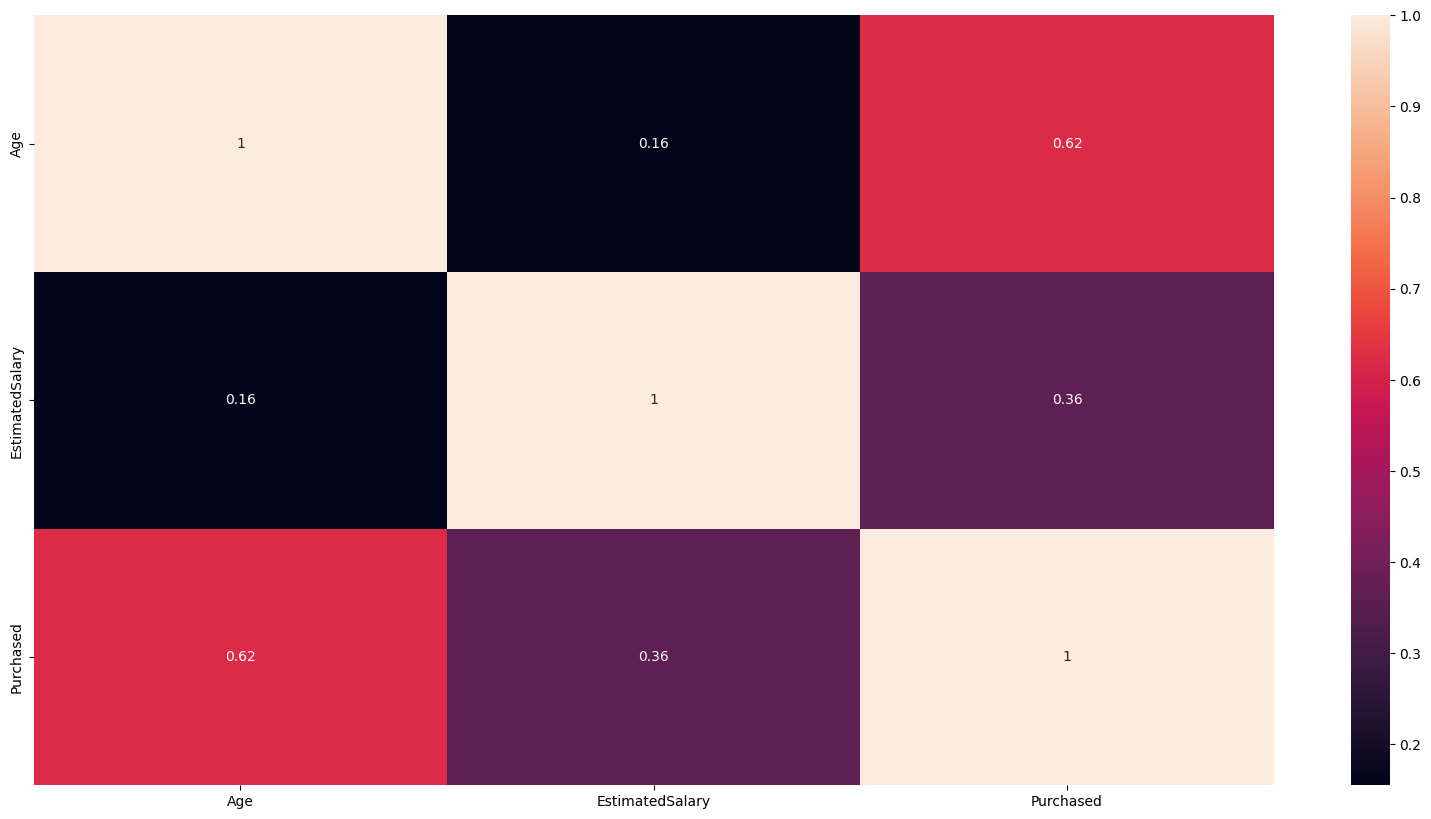

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation,annot=True)
plt.plot()

In [12]:
#considering the Age and EstimatedSalary as X and Purchased as Y


In [13]:
X=df.iloc[:,[0,1]]
Y=df.iloc[:,[-1]]

In [14]:
print(X)
print(Y)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]
     Purchased
0            0
1            0
2            0
3            0
4            0
..         ...
395          1
396          1
397          1
398          0
399          1

[400 rows x 1 columns]


In [15]:
#now splitting the data into training and testing data 

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=False)

In [17]:
#scaling for better range and understanding
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [18]:
print(x_train,x_test,y_train,y_test)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [19]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(300, 2) (100, 2) (300, 1) (100, 1)


In [20]:
#now creating a LogisticRegression Model

In [21]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()

In [22]:
logistic_model.fit(x_train,y_train)

/home/sauravmuke/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [23]:
y_pred=logistic_model.predict(x_test)

In [24]:
print(y_test,y_pred)

     Purchased
132          0
309          0
341          0
196          0
246          0
..         ...
146          1
135          0
390          1
264          1
364          1

[100 rows x 1 columns] [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1]


In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100,"%")     #amount of data come true

89.0 %


In [27]:
confusionmat=confusion_matrix(y_test,y_pred)
print(confusionmat)

[[65  3]
 [ 8 24]]


In [28]:
tp=confusionmat[0][0] #true positive
tn=confusionmat[1][1]#true negative
fp=confusionmat[1][0] #false positive
fn=confusionmat[0][1]#false negative
total=tp+tn+fp+fn
#to calculate error rate
error_rate=(fp+fn)/total
print("Error Rate: ",error_rate)
print("Accuracy Rate: ",1-error_rate)

Error Rate:  0.11
Accuracy Rate:  0.89


In [29]:
class_rep=classification_report(y_test,y_pred)
print(class_rep)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

